Name : Silva G.B.N.M. <br>
Index No: 190592X


# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

## Connected Component Analysis

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

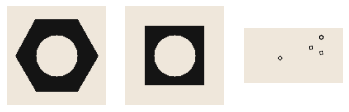

In [2]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
ax[2].axis('off')
plt.show()

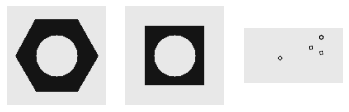

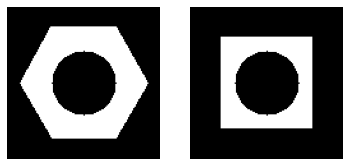

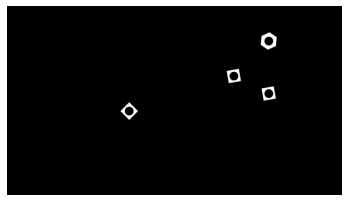

In [3]:
hex_gr = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
sq_gr = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
con_gr = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv.cvtColor(hex_gr, cv.COLOR_GRAY2RGB))
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(sq_gr, cv.COLOR_GRAY2RGB))
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(con_gr, cv.COLOR_GRAY2RGB))
ax[2].axis('off')
#plt.title("Grayscaled Converted images")
plt.show()

_ , hex_gr_ot = cv.threshold(hex_gr,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
_ , sq_gr_ot = cv.threshold(sq_gr,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
_ , con_gr_ot = cv.threshold(con_gr,0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv.cvtColor(hex_gr_ot, cv.COLOR_GRAY2RGB))
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(sq_gr_ot, cv.COLOR_GRAY2RGB))
ax[1].axis('off')
#ax[2].imshow(cv.cvtColor(con_gr_ot, cv.COLOR_GRAY2RGB))
#plt.title("Grayscaled Converted images")
plt.show()

plt.figure()
plt.imshow(cv.cvtColor(con_gr_ot, cv.COLOR_GRAY2RGB)) 
plt.axis('off')
plt.show()  # display it

# plt.figure()
# plt.imshow(cv.cvtColor(hex_gr_ot, cv.COLOR_GRAY2RGB)) 
# plt.axis('off')
# plt.show()  # display it


Carrying out morphological closing

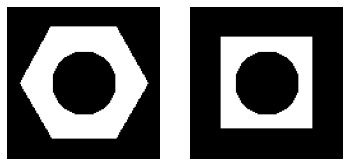

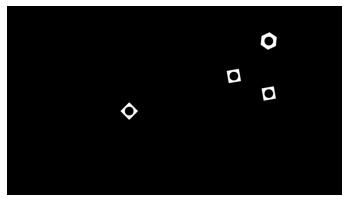

In [4]:
# hex_gr_ot = cv.bitwise_not(hex_gr_ot)
# sq_gr_ot = cv.bitwise_not(sq_gr_ot)
# con_gr_ot = cv.bitwise_not(con_gr_ot)

k = 3
kernel = np.ones((k,k),np.uint8)

hex_gr_mor = cv.morphologyEx(hex_gr_ot, cv.MORPH_CLOSE, kernel)
sq_gr_mor = cv.morphologyEx(sq_gr_ot, cv.MORPH_CLOSE, kernel)
con_gr_mor = cv.morphologyEx(con_gr_ot,cv.MORPH_CLOSE, kernel)


fig, ax = plt.subplots(1,2)
ax[0].imshow(cv.cvtColor(hex_gr_mor, cv.COLOR_GRAY2RGB))
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(sq_gr_mor, cv.COLOR_GRAY2RGB))
ax[1].axis('off')
#ax[2].imshow(cv.cvtColor(con_gr_ot, cv.COLOR_GRAY2RGB))
#plt.title("Grayscaled Converted images")
plt.show()

plt.figure()
plt.imshow(cv.cvtColor(con_gr_mor, cv.COLOR_GRAY2RGB)) 
plt.axis('off')
plt.show()  # display it

Connected Component Analysis


Hexnut_template



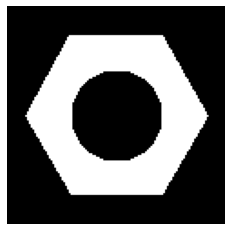

No of connected components : 2
Left staring point : 10 Top staring point : 16
horizontal width : 101 Vertical Height : 88

Squarenut_template



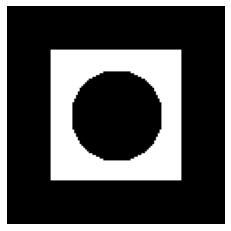

No of connected components : 2
Left staring point : 24 Top staring point : 24
horizontal width : 72 Vertical Height : 72

Conveyor_template



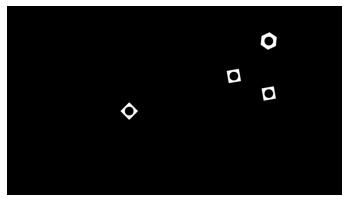

No of connected components : 5
Left staring point : 1454 Top staring point : 150
horizontal width : 92 Vertical Height : 100
Left staring point : 1259 Top staring point : 359
horizontal width : 82 Vertical Height : 82
Left staring point : 1459 Top staring point : 459
horizontal width : 82 Vertical Height : 82
Left staring point : 650 Top staring point : 550
horizontal width : 101 Vertical Height : 101


In [5]:
images = ['Hexnut_template','Squarenut_template','Conveyor_template']
morphologies = [hex_gr_mor,sq_gr_mor,con_gr_mor]
for i in range(len(images)):
    print('\n'+images[i]+'\n')
    plt.figure()
    plt.imshow(cv.cvtColor(morphologies[i], cv.COLOR_GRAY2RGB)) 
    plt.axis('off')
    plt.show() 
    nb_components, output, stats, centroids = cv.connectedComponentsWithStats(morphologies[i], connectivity=8)
    print("No of connected components : "+str(nb_components))
    for j in range(1,nb_components):
        # print("Details of component "+str(j))
        # print("Centroids of component : "+ str(centroids[j]))
        # print("Area of the component : "+ str(stats[j][-1]))
        print("Left staring point : "+ str(stats[j][0])+" Top staring point : "+str(stats[j][1]))
        print("horizontal width : "+str(stats[j][2])+" Vertical Height : "+str(stats[j][3]))
        #print(nb_components,output,stats,centroids)

Contour Analysis

(-0.5, 1919.5, 1079.5, -0.5)

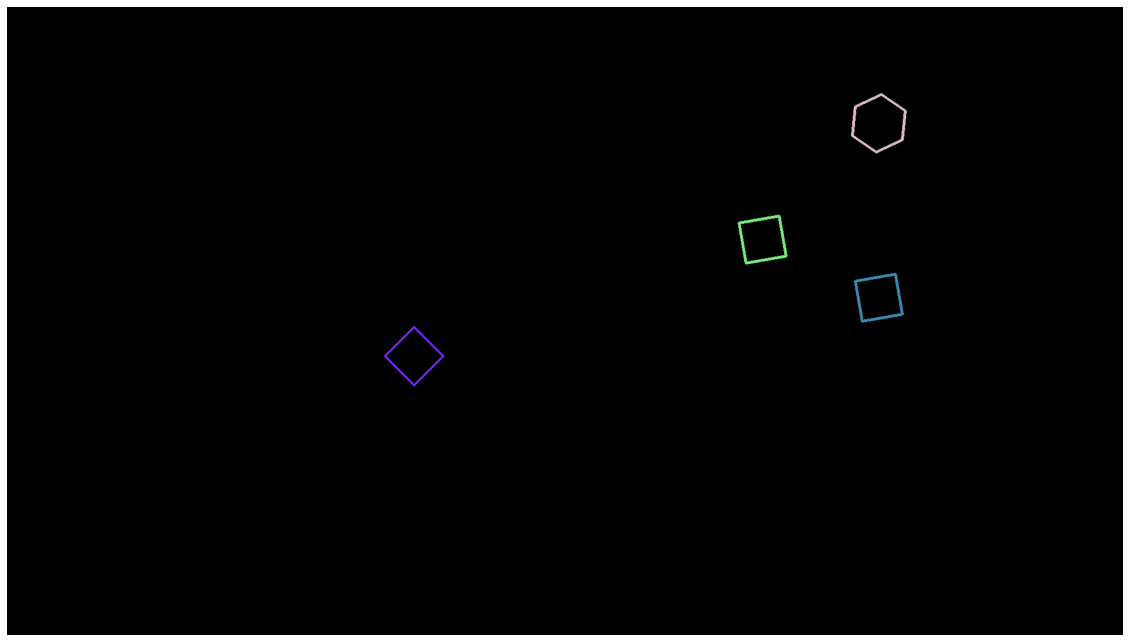

In [6]:
spaces=[0,0,0]
frame_contours = []
for i in range(3):
    contours, hierarchy = cv.findContours(morphologies[i], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    spaces[i]=np.zeros((morphologies[i].shape[0],morphologies[i].shape[1],3),dtype=np.uint8)
    frame_contours.append(contours)
    for j in range(len(contours)):
        cv.drawContours(spaces[i], contours, j,(np.random.randint(100,256),np.random.randint(256),np.random.randint(50,256)),3)
fig, ax = plt.subplots(figsize = (20,20)) 
ax.imshow(cv.cvtColor(spaces[2], cv.COLOR_BGR2RGB))
plt.axis('off')

## Detecting Objects on a Synthetic Conveyor

In [7]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


Counting Hexagonal nut

Matchings =  1


(-0.5, 1919.5, 1079.5, -0.5)

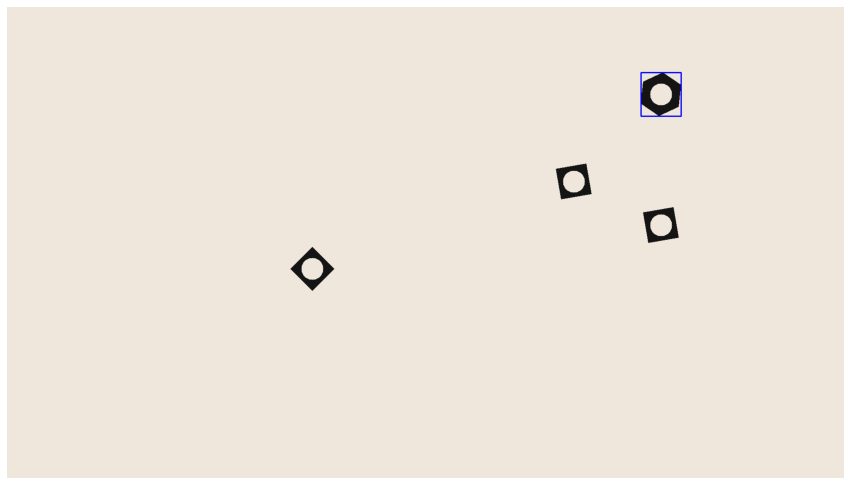

In [8]:
hex_contour = frame_contours[0][0]

total = 0

for i in frame_contours[2]:
    ret = cv.matchShapes(hex_contour,i,1,0.0)
    if ret<0.01:
        total += 1
        x,y,w,h = cv.boundingRect(i)
        cv.rectangle(conveyor_f100,(x,y),(x+w,y+h),(255,0,0),2)
print("Matchings = ",total)
fig,ax = plt.subplots(figsize = (15,15) )
ax.imshow(cv.cvtColor(conveyor_f100,cv.COLOR_BGR2RGB))
plt.axis('off')

Counting the objects that conveyed through belt

In [9]:
# Yor code here.
def object_counter(image):
    grey_image = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
    ret,th = cv.threshold(grey_image,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    smoothed = cv.morphologyEx(th,cv.MORPH_CLOSE,kernel)
    contours,hierarchy = cv.findContours(smoothed,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    obj_count = [0,0]
    for c in contours:
        ret  = cv.matchShapes(frame_contours[0][0],c,1,0.0)
        if ret < 0.001 :
            obj_count[0]+=1
            x,y,w,h = cv.boundingRect(c)
            cv.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            ret = cv.matchShapes(frame_contours[1][0],c,1,0.0)
            if ret < 0.001 :
                obj_count[1]+=1
                x,y,w,h = cv.boundingRect(c)
                cv.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    return (obj_count,image)
# Writing the video

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame_list = []      
current_count = [[0,0],[0,0]]
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    obj_count,frame = object_counter(frame)

    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    
    text1 = 'Current Hexagonal total = ' + str(obj_count[0])
    text2 = 'Current Square total = ' + str(obj_count[1])

    cv.putText(frame,text1,(100, 130), cv.FONT_HERSHEY_COMPLEX, 1, (250,0,0), 1, cv.LINE_AA)
    cv.putText(frame,text2,(100, 160), cv.FONT_HERSHEY_COMPLEX, 1, (250,0,0), 1, cv.LINE_AA)
    
    if current_count[0][0] == obj_count[0]:
        total_1 = current_count[0][1]
    else:
        increment = max(obj_count[0]-current_count[0][0],0)
        current_count[0][1] += increment
    
    if current_count[1][0] == obj_count[1]:
        total_1 = current_count[1][1]
    else:
        increment = max(obj_count[1]-current_count[1][0],0)
        current_count[1][1] += increment

    total_2 = current_count[1][1]
    current_count[1][0] = obj_count[1]

    text1 = "Hexadiagonal Contours : " +str(total_1)
    cv.putText(frame,text1,(100,190),cv.FONT_HERSHEY_COMPLEX, 1, (250,0,0), 1, cv.LINE_AA)

    text2 = "Square Contours : " +str(total_2)
    cv.putText(frame,text2,(100,220),cv.FONT_HERSHEY_COMPLEX, 1, (250,0,0), 1, cv.LINE_AA)

    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break
    frame_list.append(frame)

cap.release()
cv.destroyAllWindows()


shape = (1080, 1920, 3)
frame_list.append(frame)

# Your code here


out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_list)):
    cv.imshow('Frame', frame_list[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_list[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
